# Understanding the Driving Factors Behind Movie Success
A Data Investigation by Stuart Miller

- [Twitter](https://twitter.com/rpnuser)
- [GitHub](https://github.com/sjmiller8182)

## Introduction
The film industry, being very large, generates high revenues. Many movies are created to generate this level of revenue and not all of these films are successful. In fact, high-profile, expensive movies sometimes 'flop' or loose huge amouts of money. For instances, it was reported that "John Carter" (2012) lost approximately [$200 million USD](https://www.thisisinsider.com/movie-flops-over-the-years-2018-2#2012). With the TheMovieDB dataset from [Udacity](https://www.udacity.com/) (originally from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home)), I will look at what factors correlate to movie success.

In [1]:
#package imports and magic words

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
from collections import defaultdict, Counter
from visuals import line, bar, scatter
import TS_support as ts

%matplotlib inline

In [2]:
#read in dataset and dedupe
df_total = pd.read_csv('tmdb-movies.csv')
df_total.drop_duplicates(inplace = True)
df_total = df_total.reset_index().drop('index', axis = 1)

#Look at general structure of data after load 
df_total.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

## Data Assessment

- Total number of records: 10865 (non-null)
- Features missing records: homepage, tagline, keywords, production_companies, director, genres, overview, and cast.
- Columns containing multiple variables/values: cast, genres, production_companies.
- Column release_date should be a datetime object type.
- Column release_year should be a category type.
- Some records of budget, revenue, budget_adj, and revenue_adj are listed as 0. These values should probably be listed as nulls (np.nan).
- Column id is an indicator and should be string type.
- Only one id column is needed, imdb id can be dropped (ten records are missing).

## Cleaning

- Split cast into invidual columns (cast_1, cast_2, etc).
- Split genres into individual colmuns (genre_1, genre_2, etc).
- Split production_companies into individual colmuns (prod_comp_1, prod_comp_2, etc).
- Convert release_date to datetime object.
- Convert release_year to category type.
- Convert 0s for budget, revenue, budget_adj, and revenue_adj, to np.nan.
- Convert id to string.
- Drop imdb_id from cleaned dataframe.

## Additonal Variables

- Add revenue/budget ratio.
- Add category for revenue levels.

## Data Cleaning

### 1. Save off temp data frame for cleaning

In [4]:
df_clean = df_total.copy()

### 2. Make type conversions and value conversions

- Use .astype, .replace, .to_datetime as needed to make changes to values and types.
- Verify changes with .info.

In [5]:
df_clean.id = df_clean.id.astype('str')
df_clean.release_year = df_clean.release_year.astype('category')
df_clean.release_date = pd.to_datetime(df_clean.release_date)
financials = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
for col in financials:
    df_clean[col].replace(0, np.nan, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null object
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null category
budget_adj 

### 3. Add columns for splitting qualitative nested data

- Found that null records contained the string 'nan'. Converted to np.nan for better operation.
- Split cast, production_companies, and genres into 'level' columns.
- Drop original columns (cast, production_companies, genres)

In [6]:
#create new empty columns

for col in ['cast','production_companies','genres']:
    #value conversion for nans
    df_clean[col].replace('nan', np.nan, inplace = True)


    #find number of new columns to make
    col_cnt = df_clean[df_clean.cast.notnull()].cast.str.split('|').apply(len)
    print('Max number of ' + col + ' members listed in a column: ' +
          str(max(np.unique(col_cnt))) +
          '. \nUse this for the additional columns.')
    
    if col == 'cast':
        cast_cnt = max(col_cnt)
    elif col == 'production_companies':
        prodcomp_cnt = max(col_cnt)
    else:
        genre_cnt = max(col_cnt)
    
    #make new columns filled with nans
    for member in range(max(col_cnt)):
        df_clean[col + '_' + str(member + 1)] = [np.nan] * df_clean.shape[0]

Max number of cast members listed in a column: 5. 
Use this for the additional columns.
Max number of production_companies members listed in a column: 5. 
Use this for the additional columns.
Max number of genres members listed in a column: 5. 
Use this for the additional columns.


In [7]:
#fill new columns

#get split series
cast = df_clean['cast'].str.split('|')
prodcomp = df_clean['production_companies'].str.split('|')
genre = df_clean['genres'].str.split('|')

col_cnt = max(col_cnt)
cast_build = []
prodcomp_build = []
genre_build = []
for _ in range(col_cnt):
    cast_build.append([])
    genre_build.append([])
    prodcomp_build.append([])

#build lists for each column and set dataframe column to list
for category in ['cast','production_companies','genres']:
    for row in range(df_clean.shape[0]):
        if category == 'cast':
            temp = cast[row]
        elif category == 'production_companies':
            temp = prodcomp[row]
        else:
            temp = genre[row]
        try:
            if len(temp) != 5:
                temp = temp + [np.nan]*(5-len(temp))
        except TypeError:
            temp = [np.nan]*col_cnt
        for col in range(col_cnt):
            if category == 'cast':
                cast_build[col].append(temp[col])
            elif category == 'production_companies':
                prodcomp_build[col].append(temp[col])
            else:
                genre_build[col].append(temp[col])
    for col in range(col_cnt):
        if category == 'cast':
            df_clean[category + '_' + str(col + 1)] = cast_build[col]
        elif category == 'production_companies':
            df_clean[category + '_' + str(col + 1)] = prodcomp_build[col]
        else:
            df_clean[category + '_' + str(col + 1)] = genre_build[col]
df_clean = df_clean.drop(['cast', 'production_companies', 'genres'], axis = 1)

In [8]:
df_clean[['cast_1','cast_2','cast_3','cast_4','cast_5',
          'genres_1','genres_2','genres_3','genres_4','genres_5',
         'production_companies_1','production_companies_2','production_companies_3',
          'production_companies_4','production_companies_5',]].head()

,cast_1,cast_2,cast_3,cast_4,cast_5,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,NaN,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,NaN,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,NaN,NaN,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,NaN,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,NaN,NaN,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


### 4. Add additional financial data columns

- Drop the imdb_id as id column will be used as primary id and imdb_id is missing 10 records.

In [9]:
df_clean.drop('imdb_id', axis = 1, inplace = True)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 32 columns):
id                        10865 non-null object
popularity                10865 non-null float64
budget                    5169 non-null float64
revenue                   4849 non-null float64
original_title            10865 non-null object
homepage                  2936 non-null object
director                  10821 non-null object
tagline                   8041 non-null object
keywords                  9372 non-null object
overview                  10861 non-null object
runtime                   10865 non-null int64
release_date              10865 non-null datetime64[ns]
vote_count                10865 non-null int64
vote_average              10865 non-null float64
release_year              10865 non-null category
budget_adj                5169 non-null float64
revenue_adj               4849 non-null float64
cast_1                    10789 non-null object
cast_2              

### 5. Add additional financial data columns

- Divide revenue_adj by budget_adj to get revenue_budget_ratio
- Create revenue levels column and define as follows:
    - **Very High:** greater than 90th percentile
    - **High:** 75th percentile to 90th percentile 
    - **Medium:** median to 75th percentile
    - **Low:** 25th percentile to median
    - **Very Low:** below 25th percentile

In [11]:
#create financial ratio column
df_clean['revenue_budget_ratio'] = df_clean['revenue_adj']/df_clean['budget_adj']

In [12]:
financial_series = df_clean[df_clean.revenue_adj.notnull()].revenue_adj

# revenue level markers
percent_90 = np.percentile(financial_series,90)
percent_75 = np.percentile(financial_series,75)
median = np.median(financial_series)
percent_25 = np.percentile(financial_series,25)

rev_levels = list()
for row in range(df_clean.shape[0]):
    if df_clean['revenue_adj'][row] >= percent_90:
        rev_levels.append('very_high')
    elif (df_clean['revenue_adj'][row] >= percent_75) & (df_clean['revenue_adj'][row] < percent_90):
        rev_levels.append('high')
    elif (df_clean['revenue_adj'][row] >= median) & (df_clean['revenue_adj'][row] < percent_75):
        rev_levels.append('medium')
    elif (df_clean['revenue_adj'][row] >= percent_25) & (df_clean['revenue_adj'][row] < median):
        rev_levels.append('low')
    elif df_clean['revenue_adj'][row] < percent_25:
        rev_levels.append('very_low')
    else:
        rev_levels.append(np.nan)
df_clean['revenue_levels'] = rev_levels

## Data Exploration

### Some Questions of Interest: 
Some questions about the data to motivate exploration.
 - General Time Series
     - Does the number of movies change over time?
     - Has average budget or average revenue changed over time?
     - Does average revenue change by month?
 - Feature impacts on revenue
     - What production companies are associated with with high revenues?
     - What directors and cast members are associated with high revenue?
     - What genres are associated with high revenues?

#### Initial Time Series Exploration
- Looking at the count of movies in the dataset over time, it is apparent there are more moives in the dataset from revent times. Becuase of the lack of records in the farther back in time, it is possible that the older records are not a fair prepresentation of the total cinema in that time frame. However, the older records likely would have less impact on movie success today due to factors including changes in culture and general tastes.
- Median revenue of movies flattens over time. Before 1980, large variations in median movie revenues suggests that there are not enough older records for the data to be representative (median is influenced by outliers). After 1980, the medians are flat.
- Looking at revenue per month, May-July and Nov-Dec are the highest revenue months of the year.

Note: For this analysis, I will be looking at rows where revenue_adj and budget_adj are not null.

In [13]:
# pull rows with non-null revenue and budget data for this analysis
data = df_clean[df_clean.revenue_adj.notnull() & df_clean.budget_adj.notnull()]

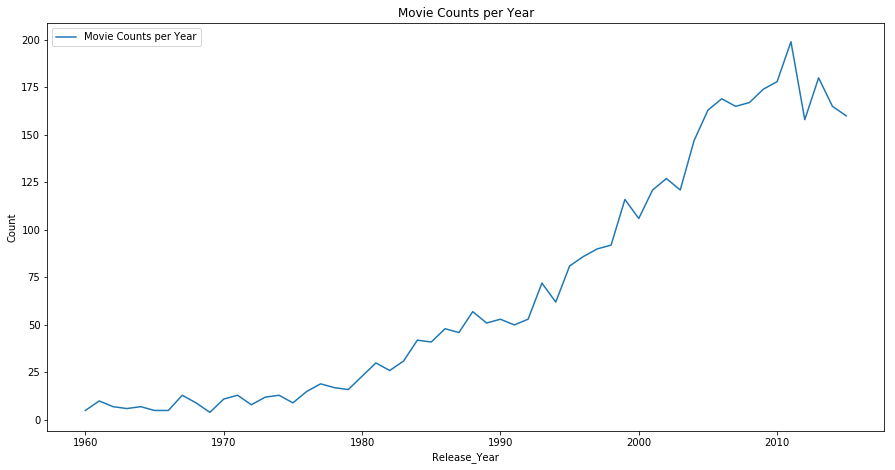

In [14]:
# plot the number of movies in the data for each year
x, y = ts.get_counts(data, 'release_year', 'revenue_adj')
line(x,y,
    'Movie Counts per Year','Movie Counts per Year',
    'Release_Year',
    'Count')

Plot shows very low number of movies before 1980 when the count starts to rise. Low number of records could mean the data is not representative of the generality.

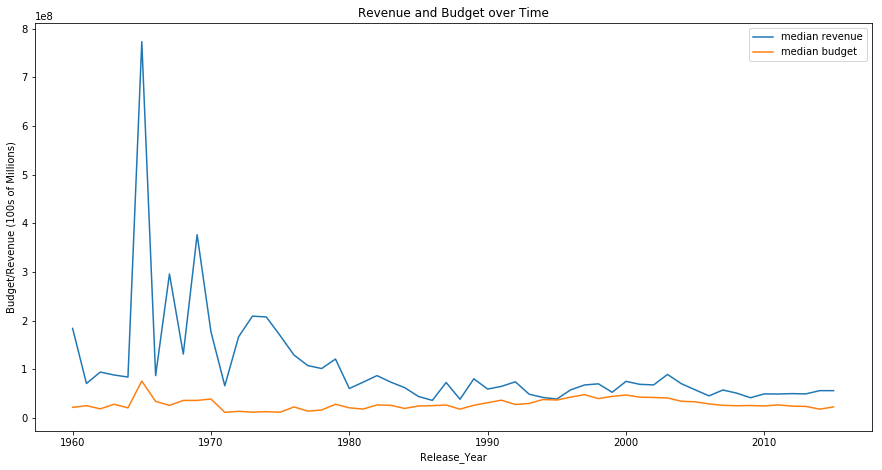

In [15]:
# plot the number of movies in the data for each year
ys = list()
labels = ['median revenue', 'median budget']
for feature in ['revenue_adj', 'budget_adj']:
    x, y = ts.get_medians(data, 'release_year', feature)
    ys.append(y)
line(x,ys,
    labels,
    'Revenue and Budget over Time',
    'Release_Year',
    'Budget/Revenue (100s of Millions)')

Plotting the median of revenue shows large deviations before 1980. Records before 1980 may not be representative.

In [16]:
m_data = data[(data['release_date'] >= '1980-01-01')].reset_index()
m_data['release_month'] = list(m_data.release_date.dt.month)

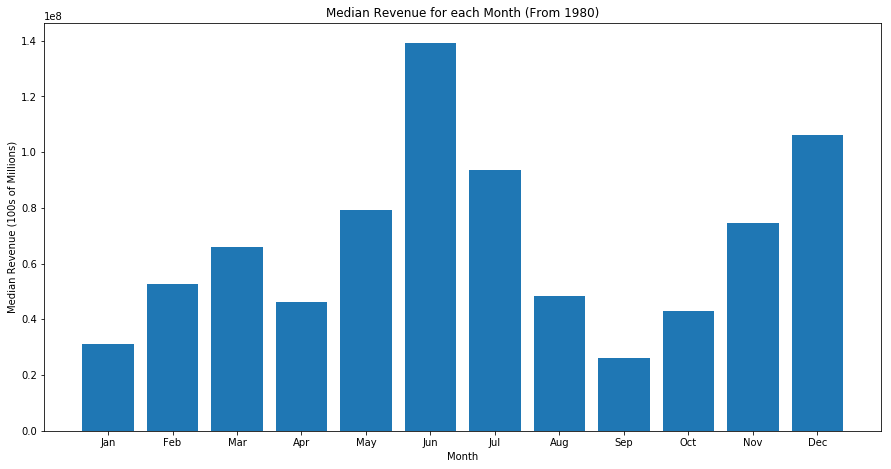

In [17]:
x, y = ts.get_medians(m_data, 'release_month', 'revenue_adj')
labels = [calendar.month_name[m][:3] for m in x]
bar(x, y, labels,
    'Median Revenue for each Month (From 1980)',
    'Month', 'Median Revenue (100s of Millions)')

The higher revenue monthes are May-July (summer) and Nov-Dec (winter).

#### Relaitionships Between Revenue and Other Output Variables
Along with revenue, there are several other observables included in the data set including popularity, vote_average, and vote_count.

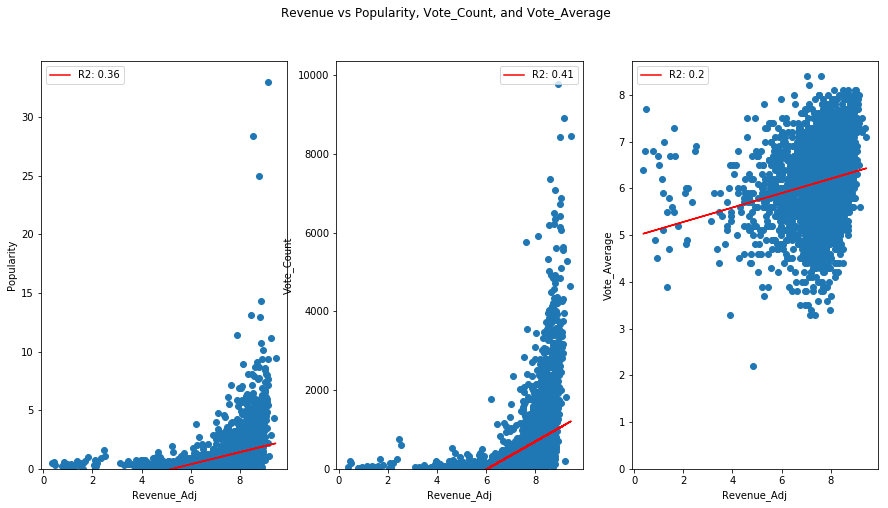

In [18]:
from scipy.stats import linregress as linreg

fig, ax = plt.subplots( ncols=3, figsize = (15,7.5))

x = np.log10(m_data.revenue_adj)
features = ['popularity','vote_count','vote_average']
feat = 0

for col in ax:
    y = m_data[features[feat]]
    col.scatter(x, y, label = None)
    m, b, r2, pv, std_error = linreg(x, y)
    col.plot(x, m * x + b, label = 'R2: ' + str(np.round(r2,2)), c= 'r')
    col.set_ylabel(features[feat].title())
    col.set_xlabel('Revenue_Adj')
    col.set_ylim(0)
    col.legend()
    feat += 1
fig.suptitle('Revenue vs Popularity, Vote_Count, and Vote_Average')
plt.show()

There does not seem to be a direct link between revenue and the other outputs. At the high revenue levels there is a large amount of variance in the other variables.

### Input Variables Impact on Revenue
Now taking a look at how imput variables impact revenue. The input variables to consider are:
 1. Genre
 2. Directors
 3. Cast
 4. Production Companies 
 
#### Genres
Out of interest, I will start with genre. There are maximum of 5 genres listed per film. I broke them out to individual columns. First off, the basic information:  
What are the genre options, how many are there across the 5 columns, and how common are they?

In [19]:
g_row_counts = []
all_genres = []
for i in range(5):
    all_genres += m_data['genres_' + str(i+1)].tolist()
    g_row_counts.append(m_data[m_data['genres_' + str(i+1)].notnull()].count()['genres_' + str(i+1)])
print(np.unique(all_genres))
print('There are ' + str(len(np.unique(all_genres))) + ' genres in this data set.')

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western' 'nan']
There are 21 genres in this data set.


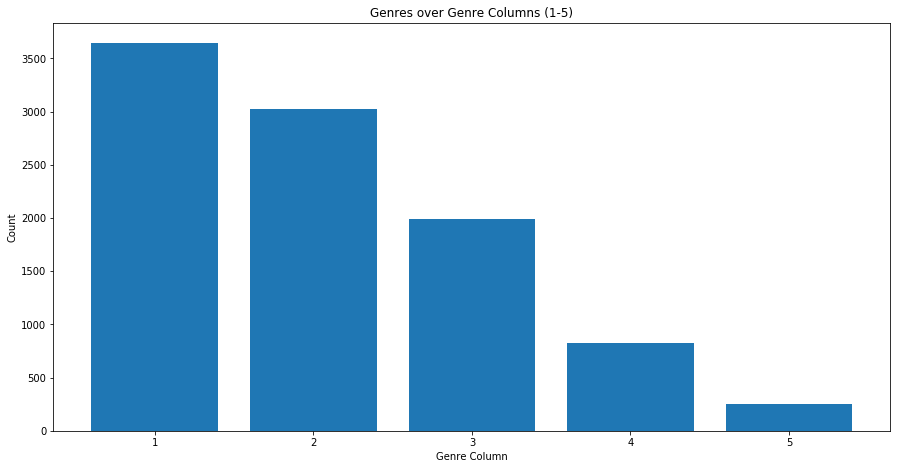

In [20]:
bar(np.arange(1,len(g_row_counts) + 1), g_row_counts, title = 'Genres over Genre Columns (1-5)',
   x_lab = 'Genre Column', y_lab = 'Count')

The genre categories drops off quickly, more than 1000 counts by column 3. Becasue of this we will look at the genres in the first 2 positions.

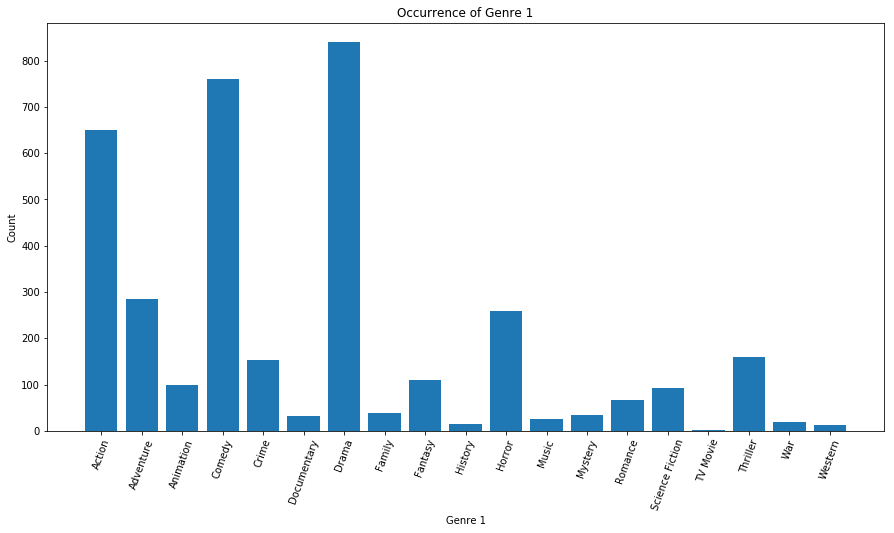

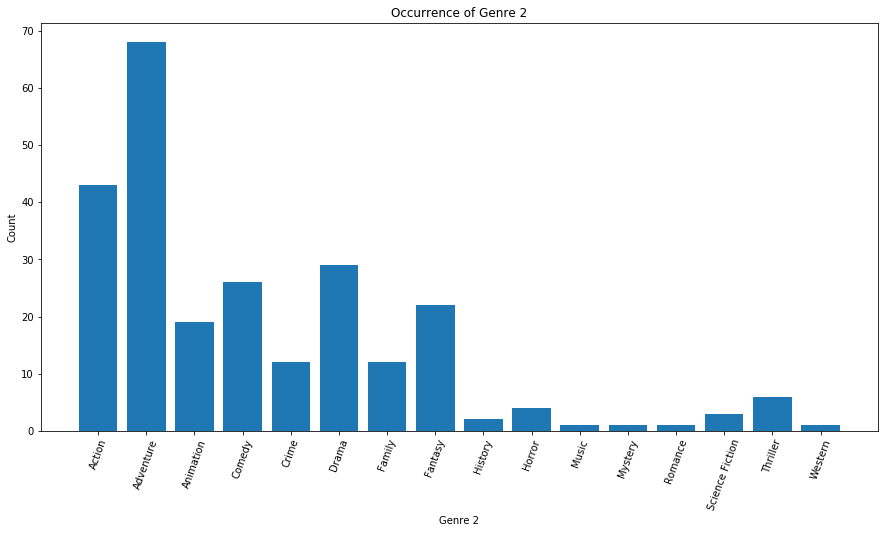

In [21]:
g, c = ts.get_counts(m_data, 'genres_1', 'revenue_adj')
bar(np.arange(len(g)), c, labels = g,
   title = 'Occurrence of Genre 1', x_lab = 'Genre 1', y_lab = 'Count',
   xticks_rot = 70)
g, c = ts.get_counts(m_data[m_data['genres_' + str(i+1)].notnull()], 'genres_2', 'revenue_adj')
bar(np.arange(len(g)), c, labels = g,
   title = 'Occurrence of Genre 2', x_lab = 'Genre 2', y_lab = 'Count',
   xticks_rot = 70)

- From the first bin, the top 8 genres are Drama, Comedy, Action, Adventure, Horror, Thriller, Crime, and Fantasy. 
- From the second bin, the top 8 genres are Adventure, Action, Drama, Comedy, Fantasy, Anamation, Crime, and Family

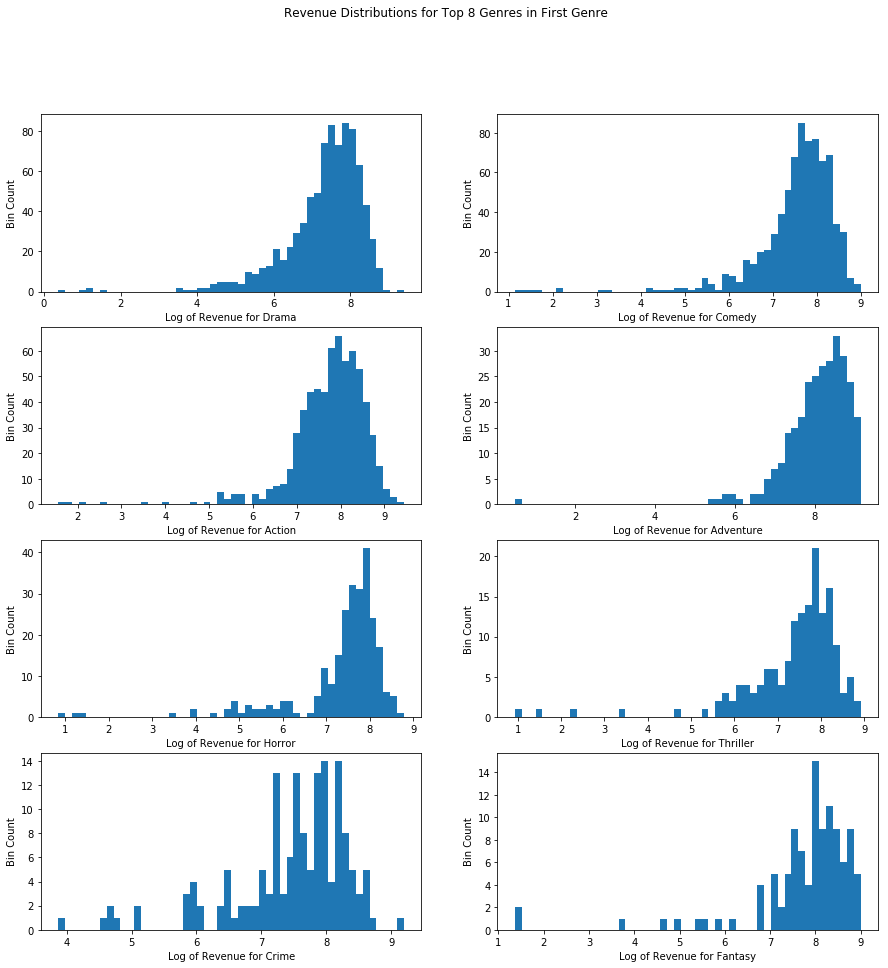

In [22]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (15,15))

features = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Thriller', 'Crime', 'Fantasy']
feat = 0

for col in ax:
    for row in col:
        y = np.log10(m_data.query('genres_1 == "' + features[feat] + '"').revenue_adj)
        row.hist(y,50)
        row.set_ylabel('Bin Count')
        row.set_xlabel('Log of Revenue for ' + features[feat])
        feat += 1
fig.suptitle('Revenue Distributions for Top 8 Genres in First Genre')
plt.show()

For the first genre, Adventure has the best weight toward the highest revenue levels. Comedy and drama, with the most number of records, appear to be one population with a tail to the lower revenues. The other generes appeat to be bimodal or multimodel.  
  
Now for the second genre.

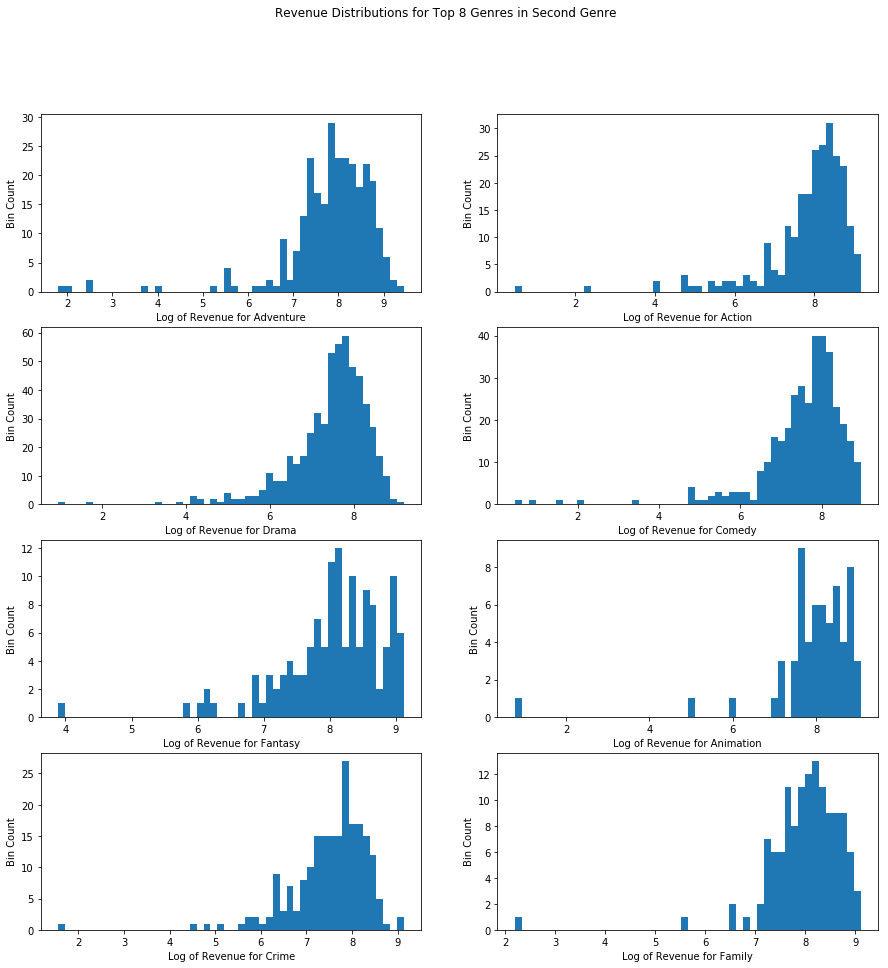

In [23]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (15,15))

features = ['Adventure', 'Action', 'Drama', 'Comedy', 'Fantasy', 'Animation', 'Crime', 'Family']
feat = 0

for col in ax:
    for row in col:
        y = np.log10(m_data.query('genres_2 == "' + features[feat] + '"').revenue_adj)
        row.hist(y,50)
        row.set_ylabel('Bin Count')
        row.set_xlabel('Log of Revenue for ' + features[feat])
        feat += 1
fig.suptitle('Revenue Distributions for Top 8 Genres in Second Genre')
plt.show()

Out of the distributions for the genres in the second level, Action seems to be weighted most favorably.  
  
Looking at this with revenue levels may make this more obvious (courser details and emphasizes the higher levels more). 

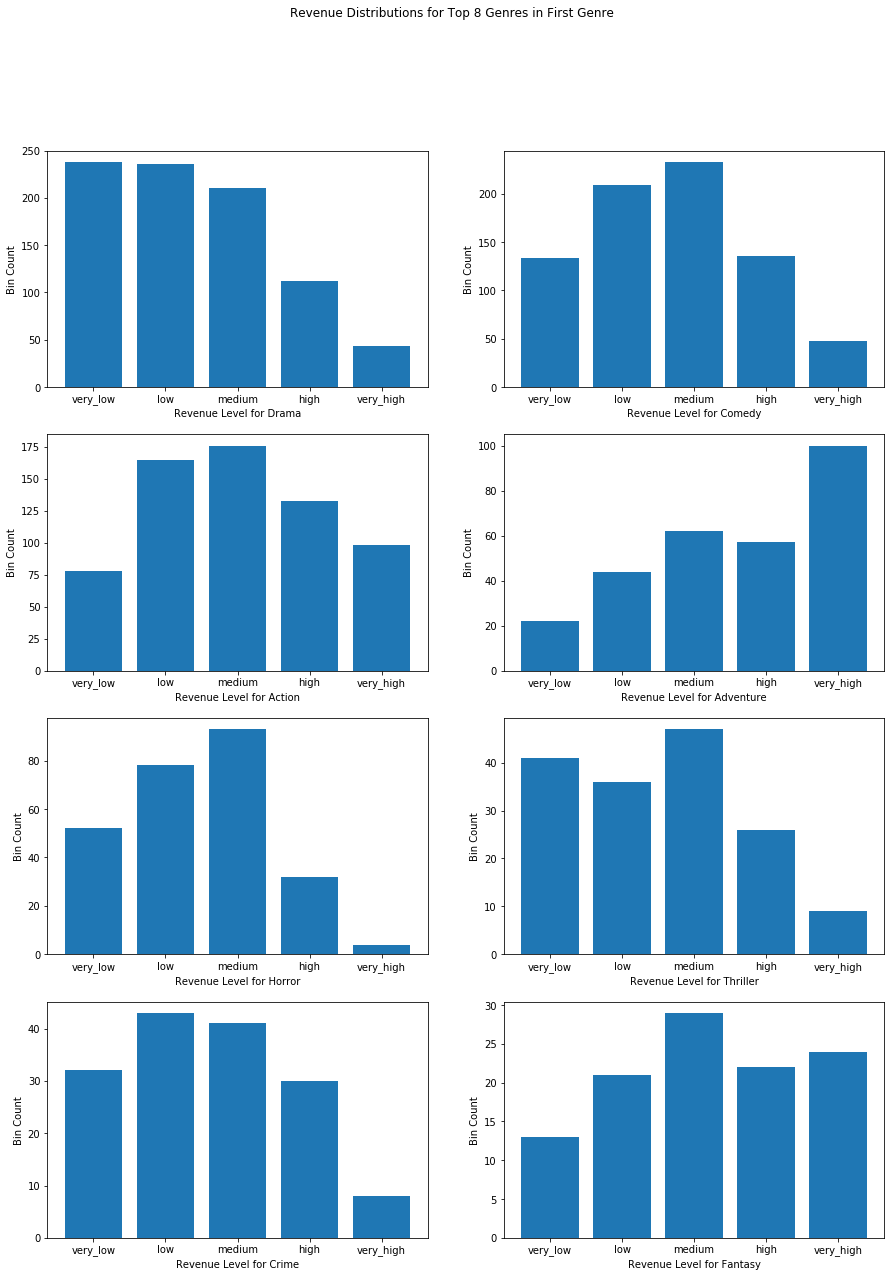

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (15,20))
rev_level_map = {'very_high':4,'high':3,'medium':2,'low':1,'very_low':0}
features = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Thriller', 'Crime', 'Fantasy']
feat = 0

for col in ax:
    for row in col:
        x = list()
        lev, y = ts.get_counts(m_data.query('genres_1 == "' + features[feat] + '"'), 'revenue_levels', 'revenue_adj')
        for level in lev:
            x.append(rev_level_map[level])
        row.bar(x,y)
        row.set_xticklabels(['l', 'very_low', 'low', 'medium', 'high', 'very_high'])
        row.set_ylabel('Bin Count')
        row.set_xlabel('Revenue Level for ' + features[feat])
        feat += 1
fig.suptitle('Revenue Distributions for Top 8 Genres in First Genre')
plt.show()

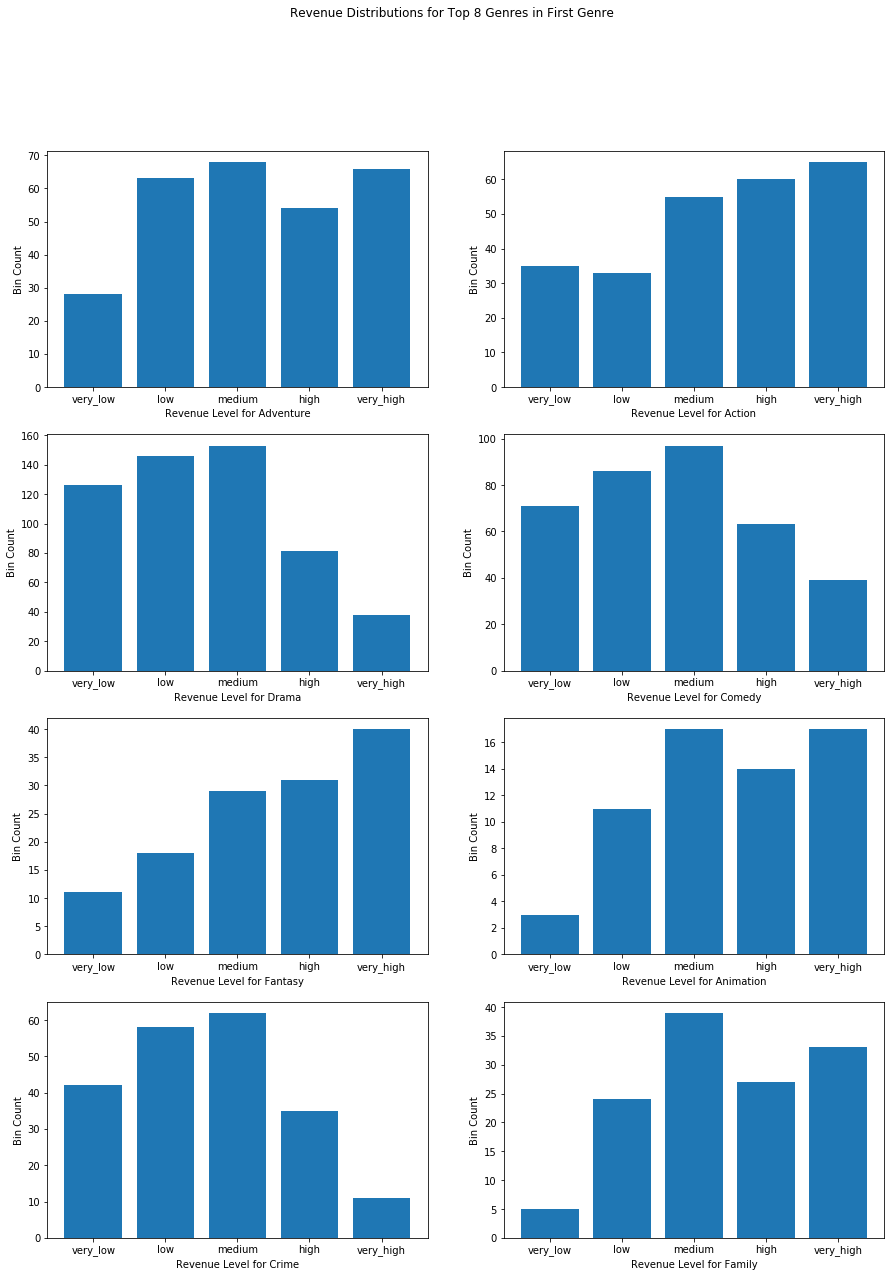

In [25]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (15,20))
rev_level_map = {'very_high':4,'high':3,'medium':2,'low':1,'very_low':0}
features = ['Adventure', 'Action', 'Drama', 'Comedy', 'Fantasy', 'Animation', 'Crime', 'Family']
feat = 0

for col in ax:
    for row in col:
        x = list()
        lev, y = ts.get_counts(m_data.query('genres_2 == "' + features[feat] + '"'), 'revenue_levels', 'revenue_adj')
        for level in lev:
            x.append(rev_level_map[level])
        row.bar(x,y)
        row.set_xticklabels(['l', 'very_low', 'low', 'medium', 'high', 'very_high'])
        row.set_ylabel('Bin Count')
        row.set_xlabel('Revenue Level for ' + features[feat])
        feat += 1
fig.suptitle('Revenue Distributions for Top 8 Genres in First Genre')
plt.show()

Both genre 1 and genre 2 have fairly wide spreads for the selected genres. However, there are features that are weighted more toward the high revenue levels such as Adventure in genres 1 and Action in genres 2. Possibly, the combination of these two genres is correlated better for revenues.

In [26]:
# get median revenues for each combination of genres_1 and gneres_2
m_data['comb_1_2'] = m_data['genres_1'] + m_data['genres_2']
comb_data = m_data[m_data['comb_1_2'].notnull()]
g, c = ts.get_medians(comb_data, 'comb_1_2', 'revenue_adj')
comb_mean = pd.DataFrame({'rev':c,'genre':g})

In [27]:
# print top ten genre combinations
comb_mean.sort_values('rev',ascending = False).head(10)

,rev,genre
99,5.532103e+08,HistoryRomance
135,5.196910e+08,Science FictionAdventure
130,4.377994e+08,RomanceFamily
23,3.801392e+08,AdventureThriller
29,3.614170e+08,AnimationFamily
101,3.466309e+08,HorrorAdventure
132,3.354559e+08,RomanceHorror
139,3.254153e+08,Science FictionFantasy
90,3.252100e+08,FantasyFamily
14,3.241894e+08,AdventureAction


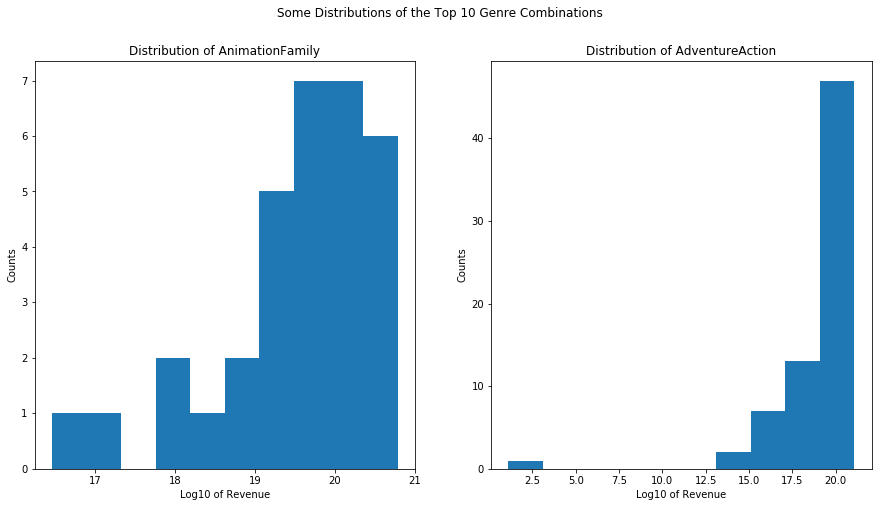

In [28]:
# histograms for combinations with several rows
fig, ax = plt.subplots(ncols=2, figsize = (15,7.5))
genres_combs = ['AnimationFamily','AdventureAction']
genre = 0
for col in ax:
    col.hist(np.log(comb_data.query('comb_1_2 == "' + genres_combs[genre] + '"')['revenue_adj']));
    col.set_ylabel('Counts')
    col.set_xlabel('Log10 of Revenue')
    col.set_title('Distribution of ' + genres_combs[genre])
    genre += 1
fig.suptitle('Some Distributions of the Top 10 Genre Combinations')
plt.show()

It looks the movies with these two combinations of genres, are well weighted toward the upper revenue values. 

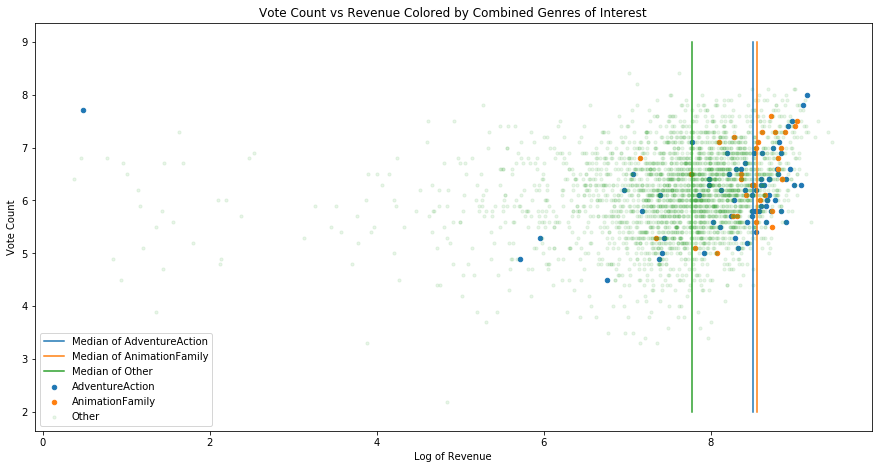

In [29]:
# filter temp dataframe on these genres
def filter_names(name):
    if name not in ['AnimationFamily','AdventureAction']:
        return 'Other'
    else:
        return name

temp = comb_data.copy()
temp['comb_1_2'] = temp['comb_1_2'].apply(filter_names)
groups = temp.groupby('comb_1_2')
plt.figure(figsize=(15,7.5));
for name, group in groups:
    if name in genres_combs:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 20, alpha = 1);
    else:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 10, alpha = .1);
    m = np.median(np.log10(group.revenue_adj))
    plt.plot([m, m],[2,9], label = 'Median of ' + name);
plt.xlabel('Log of Revenue')
plt.ylabel('Vote Average')
plt.title('Vote Count vs Revenue Colored by Combined Genres of Interest')
plt.legend();
plt.show();


The combination of these genres, clearly shows higher median revenue than the rest of the movies. This may serve as a good differentiating factor.  
  
#### Cast
Lets take a look at the impact of cast next.

In [30]:
tc = m_data.shape[0]
cast_counts = list()
for i in range(5):
    cast_counts.append(tc-m_data['cast_' + str(i+1)].count())
print('Number of missing records for cast:')
for i in range(5):
    print('cast_' + str(i+1) + ':' + str(cast_counts[i]))

Number of missing records for cast:
cast_1:4
cast_2:8
cast_3:8
cast_4:16
cast_5:37


Small number of missing rows for each cast column. Drop off the records.

In [31]:
filt = ['cast_' + str(i+1) for i in range(5)]
row_f = m_data['cast_1'].notnull()
for i in range(len(filt)):
    row_f = row_f & m_data['cast_' + str(i+1)].notnull()
c_data = m_data[row_f]

In [32]:
removed = m_data.shape[0] - c_data.shape[0]
print('Number of rows removed: ' + str(removed))

Number of rows removed: 37


In [33]:
print('Number of unique values in each cast column')
for i in range(5):
    count = len(np.unique(c_data['cast_' + str(i+1)]))
    print('cast_' + str(i+1) + ': ' + str(count))

Number of unique values in each cast column
cast_1: 1320
cast_2: 1861
cast_3: 2260
cast_4: 2533
cast_5: 2710


In [34]:
def sort_by_val(tup):
    return tup[1]

g, count = ts.get_medians(c_data,'cast_1','revenue_adj')
zipped = list()
for i, k in zip(g, count):
    zipped.append((i,k))
zipped = sorted(zipped, key = sort_by_val, reverse = True)

In [35]:
c_names = list()
for i in range(10):
    c_names.append(zipped[i][0])
    print(zipped[i])

('Henry Thomas', 1791694309.0)
('Mark Hamill', 1339222584.5)
('Jonathan Taylor Thomas', 1159591590.0)
('Chris Pratt', 1052368511.6)
('Daniel Radcliffe', 954305868.0)
('Sam Neill', 921506247.95)
('Martin Freeman', 879752289.1)
('William Moseley', 836090359.2)
('John Leguizamo', 833158215.1)
('Amy Poehler', 785411574.7)


In [36]:
print('Actors from the top 10 median revenue movies')
for c in c_names:
    print('\nMovie records for ' + c)
    names = c_data[(c_data['cast_1'] == c) | (c_data['cast_2'] == c) | (c_data['cast_3'] == c) | \
                   (c_data['cast_4'] == c) | (c_data['cast_5'] == c)]['original_title']
    for name in names:
        print(name)

Actors from the top 10 median revenue movies

Movie records for Henry Thomas
Dear John
Legends of the Fall
E.T. the Extra-Terrestrial
Fire in the Sky

Movie records for Mark Hamill
Star Wars: The Force Awakens
The Empire Strikes Back
Return of the Jedi
Batman: Mask of the Phantasm

Movie records for Jonathan Taylor Thomas
The Lion King

Movie records for Chris Pratt
Jurassic World
Guardians of the Galaxy
Bride Wars
What's Your Number?
Moneyball
Zero Dark Thirty
The Five-Year Engagement
Delivery Man

Movie records for Daniel Radcliffe
Victor Frankenstein
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows: Part 1
Harry Potter and the Philosopher's Stone
Harry Potter and the Deathly Hallows: Part 2
Harry Potter and the Chamber of Secrets
The Woman in Black
What If
Harry Potter and the Goblet of Fire
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
December Boys

Movie records for Sam Neill
Daybreakers
Bicentennial Man
Jurassic Par

In [37]:
c = 'John Leguizamo'
names = c_data[(c_data['cast_1'] == c) | (c_data['cast_2'] == c) | (c_data['cast_3'] == c) | (c_data['cast_4'] == c) | \
               (c_data['cast_5'] == c)]['original_title']

In [38]:
temp = c_data.copy()
temp = temp[['cast_1','cast_2','cast_3','cast_4','cast_5','revenue_adj', 'vote_average']]
temp['plt_name'] = 'l'

def filter_names(row):
    other = True
    target_names = ['John Leguizamo','Sam Neill','Daniel Radcliffe','Amy Poehler']
    names = row['cast_1'] + row['cast_2'] + row['cast_3'] + row['cast_4'] + row['cast_5']
    for tr in target_names:
        if tr in names:
            other = False
            break
    if other:
        row['plt_name'] = 'Other'
    else:
        row['plt_name'] = tr
    return row
        
temp = temp.apply(filter_names, axis=1)

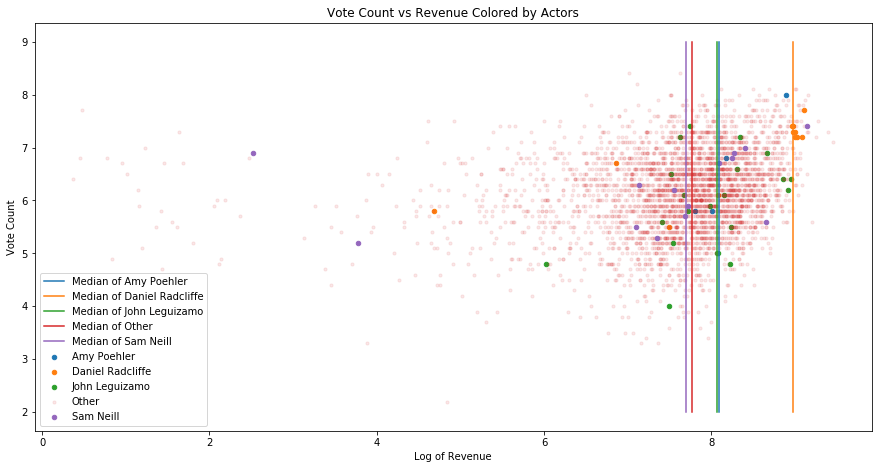

In [39]:
groups = temp.groupby('plt_name')
plt.figure(figsize=(15,7.5));
for name, group in groups:
    if name in ['John Leguizamo','Sam Neill','Daniel Radcliffe','Amy Poehler']:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 20, alpha = 1);
    else:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 10, alpha = .1);
    m = np.median(np.log10(group.revenue_adj))
    plt.plot([m, m],[2,9], label = 'Median of ' + name);
plt.xlabel('Log of Revenue')
plt.ylabel('Vote Average')
plt.title('Vote Count vs Revenue Colored by Actors')
plt.legend();
plt.show();

Based on the given data, there does appear to be a correspondance between actors and revenue, where the actor is listed as first actor in the movie. The median revenues for three out of the four actors appearing as first actor in the top ten are above the medain of all others.
  
#### Production Companies
Lets take a look at the impact of production companies next.

In [40]:
tc = m_data.shape[0]
cast_counts = list()
for i in range(5):
    cast_counts.append(tc-m_data['production_companies_' + str(i+1)].count())
print('Number of missing records for production companies:')
for i in range(5):
    print('production_companies_' + str(i+1) + ':' + str(cast_counts[i]))

Number of missing records for production companies:
production_companies_1:46
production_companies_2:838
production_companies_3:1712
production_companies_4:2467
production_companies_5:2958


Since there is a big drop in production companies between each listing, let consider only the first listing `production_companies_1`.

In [41]:
un = len(np.unique(m_data[m_data['production_companies_1'].notnull()]['production_companies_1']))
print('The number of unique production companies is ' + str(un))
un_tot = m_data.shape[0]
print('The total number of records is ' + str(un_tot))

The number of unique production companies is 835
The total number of records is 3650


In [42]:
p_data = m_data[m_data['production_companies_1'].notnull()]
company, y = ts.get_medians(p_data, 'production_companies_1','revenue_adj')
x, z = ts.get_counts(p_data, 'production_companies_1','revenue_adj')

In [43]:
def sort_by_rev(tup):
    return tup[1]
def sort_by_occ(tup):
    return tup[2]

df_rev = pd.DataFrame(sorted(zip(company,y,z), key = sort_by_rev, reverse = True), columns = ['company','median_rev','occurance'])
df_rev.head(10)

,company,median_rev,occurance
0,Patalex IV Productions Limited,1.000353e+09,1
1,1492 Pictures,9.872809e+08,4
2,Cool Music,9.866889e+08,1
3,Lucasfilm,8.340611e+08,13
4,WingNut Films,7.469310e+08,12
5,Marvel Studios,6.239333e+08,11
6,DreamWorks Animation,4.948788e+08,17
7,Bookshop Productions,4.763508e+08,1
8,Blue Sky Studios,4.652620e+08,8
9,Eon Productions,4.603898e+08,10


Notice several of the production companies in the top ten only occured once in the data set. Lets see rank the data by occurances.

In [44]:
df_occ = pd.DataFrame(sorted(zip(company,y,z), key = sort_by_occ, reverse = True), columns = ['company','median_rev','occurance'])
df_occ.head(10)

,company,median_rev,occurance
0,Universal Pictures,9.587209e+07,263
1,Paramount Pictures,1.236627e+08,246
2,Columbia Pictures,1.179789e+08,171
3,New Line Cinema,7.030805e+07,144
4,Twentieth Century Fox Film Corporation,1.318352e+08,144
5,Walt Disney Pictures,1.851975e+08,116
6,Miramax Films,3.275456e+07,78
7,Village Roadshow Pictures,1.140805e+08,66
8,Warner Bros.,7.416766e+07,64
9,Columbia Pictures Corporation,1.163845e+08,61


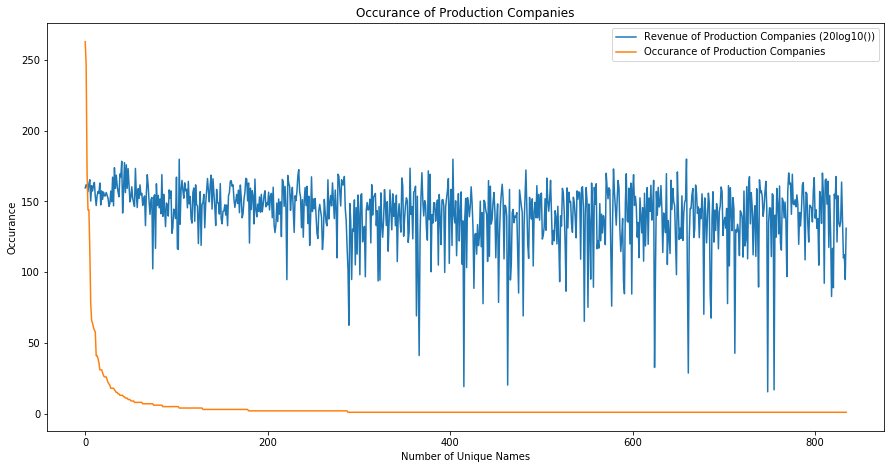

In [45]:
ys = list()
for i in zip(*sorted(zip((20)*np.log10(df_occ.median_rev), df_occ.occurance), key = sort_by_rev, reverse = True)):
    ys.append(i)

line(np.arange(len(df_occ.occurance)),ys,
    ['Revenue of Production Companies (20log10)','Occurance of Production Companies'],
    y_lab = 'Occurance', x_lab = 'Number of Unique Names', 
    title = 'Occurance of Production Companies')

There is a steep dropoff in the number of unique production company names. Not suprizingly, the variation in revenue increases as the name occurance decreases.

In [46]:
pc_names = ['Lucasfilm', 'WingNut Films', 'Marvel Studios', 'DreamWorks Animation']
print('Production companies from the top 10 median revenue movies')
for pc in pc_names:
    print('\nMovie records for ' + pc)
    names = m_data[(m_data['production_companies_1'] == pc) | (m_data['production_companies_2'] == pc) | \
                   (m_data['production_companies_3'] == pc) | (m_data['production_companies_4'] == pc) | \
                   (m_data['production_companies_5'] == pc)]['original_title']
    for name in names:
        print(name)

Production companies from the top 10 median revenue movies

Movie records for Lucasfilm
Star Wars: The Force Awakens
Star Wars: Episode I - The Phantom Menace
Indiana Jones and the Kingdom of the Crystal Skull
Star Wars: The Clone Wars
Star Wars: Episode II - Attack of the Clones
Star Wars: Episode III - Revenge of the Sith
The Empire Strikes Back
Indiana Jones and the Temple of Doom
Return of the Jedi
Raiders of the Lost Ark
Indiana Jones and the Last Crusade
Willow
Labyrinth

Movie records for WingNut Films
The Hobbit: The Battle of the Five Armies
District 9
The Lovely Bones
The Lord of the Rings: The Fellowship of the Ring
The Adventures of Tintin
The Lord of the Rings: The Two Towers
Heavenly Creatures
The Hobbit: An Unexpected Journey
The Lord of the Rings: The Return of the King
The Hobbit: The Desolation of Smaug
King Kong
Braindead
The Frighteners

Movie records for Marvel Studios
Avengers: Age of Ultron
Ant-Man
Guardians of the Galaxy
Captain America: The Winter Soldier
Iron 

In [47]:
temp = p_data.copy()
temp = temp[['production_companies_1','production_companies_2','production_companies_3',
             'production_companies_4','production_companies_5','revenue_adj', 'vote_average']]
for i in range(5):
    temp['production_companies_' + str(i+1)].fillna('', inplace = True)

temp['plt_name'] = 'l'

def filter_names(row):
    other = True
    target_names = ['Lucasfilm', 'WingNut Films', 'Marvel Studios', 'DreamWorks Animation']
    names = row['production_companies_1'] + row['production_companies_2'] + row['production_companies_3']  +\
    row['production_companies_4'] + row['production_companies_5']
    for tr in target_names:
        if tr in names:
            other = False
            break
    if other:
        row['plt_name'] = 'Other'
    else:
        row['plt_name'] = tr
    return row
        
temp = temp.apply(filter_names, axis=1)

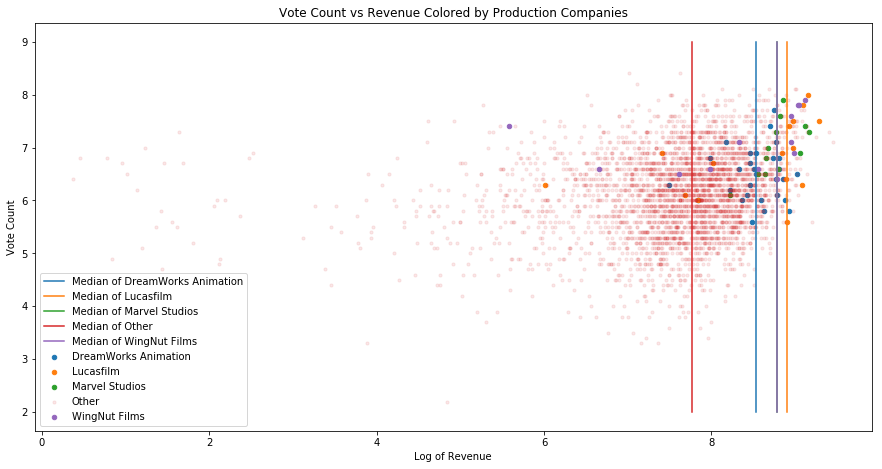

In [48]:
groups = temp.groupby('plt_name')
plt.figure(figsize=(15,7.5));
for name, group in groups:
    if name in ['Lucasfilm', 'WingNut Films', 'Marvel Studios', 'DreamWorks Animation']:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 20, alpha = 1);
    else:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 10, alpha = .1);
    m = np.median(np.log10(group.revenue_adj))
    plt.plot([m, m],[2,9], label = 'Median of ' + name);
plt.xlabel('Log of Revenue')
plt.ylabel('Vote Average')
plt.title('Vote Count vs Revenue Colored by Production Companies')
plt.legend();
plt.show();

As with cast, it appears that production companies in the first list appear to be a decent predictor of revenue.
  
#### Directors
Lets take a look at the impact of directors next. Note that director was not split into multiple columns even though some rows contain multiple names. This is because, unlike cast, director is more of a singular role, even when multiple directors are involved.

In [49]:
un = len(np.unique(m_data[m_data['director'].notnull()]['director']))
un_tot = m_data.shape[0]
print('The number of unique directors is ' + str(un))
print('The total number of records is ' + str(un_tot))

The number of unique directors is 1643
The total number of records is 3650


In [50]:
df_dir = m_data[m_data['director'].notnull()]
df_dir = df_dir[['revenue_adj','director']]
dirs, m_rev = ts.get_medians(df_dir, 'director', 'revenue_adj')
_, occ = ts.get_counts(df_dir, 'director', 'revenue_adj')

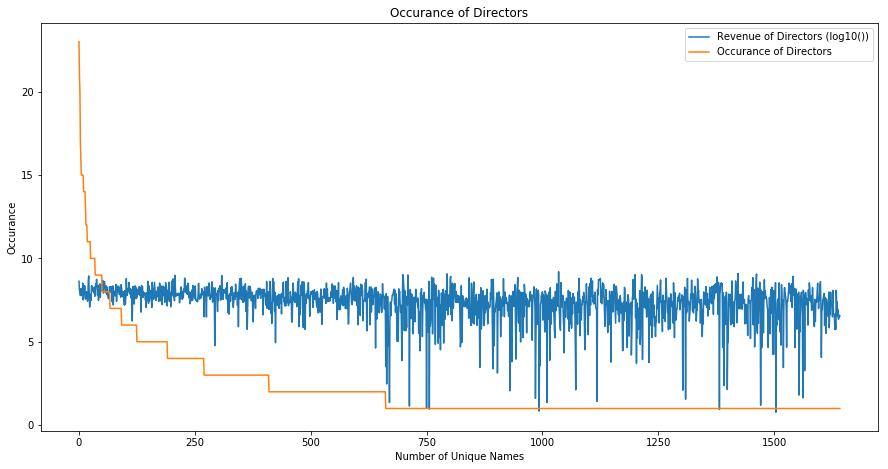

In [51]:
ys = list()
for i in zip(*sorted(zip(np.log10(m_rev), occ), key = sort_by_rev, reverse = True)):
    ys.append(i)

line(np.arange(len(occ)),ys,
    ['Revenue of Directors (log10)','Occurance of Directors'],
    y_lab = 'Occurance', x_lab = 'Number of Unique Names', 
    title = 'Occurance of Directors')

In [52]:
df_rev = pd.DataFrame(sorted(zip(dirs,m_rev,occ), key = sort_by_rev, reverse = True), \
                      columns = ['company','median_rev','occurance'])
df_rev.head(30)

,company,median_rev,occurance
0,Irwin Winkler,1.583050e+09,1
1,Richard Marquand,1.253819e+09,1
2,Chris Buck|Jennifer Lee,1.192711e+09,1
3,Roger Allers|Rob Minkoff,1.159592e+09,1
4,Kyle Balda|Pierre Coffin,1.064192e+09,1
5,Lee Unkrich,1.063172e+09,1
6,Andrew Adamson|Kelly Asbury|Conrad Vernon,1.061904e+09,1
7,Andrew Stanton|Lee Unkrich,1.024887e+09,1
8,David Yates,9.704974e+08,4
9,George Lucas,9.490788e+08,3


In [53]:
temp = m_data.copy()
temp = temp[['director','revenue_adj', 'vote_average']]
temp['director'].fillna('', inplace = True)

temp['plt_name'] = 'l'

def filter_names(row):
    other = True
    target_names = ['David Yates','Peter Jackson','Colin Trevorrow','Marc Webb']
    names = row['director']
    for tr in target_names:
        if tr in names:
            other = False
            break
    if other:
        row['plt_name'] = 'Other'
    else:
        row['plt_name'] = tr
    return row
        
temp = temp.apply(filter_names, axis=1)

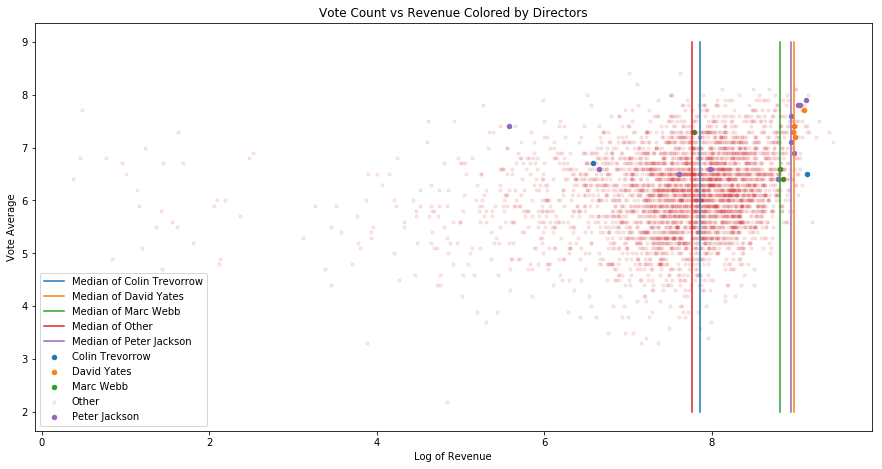

In [55]:
groups = temp.groupby('plt_name')
plt.figure(figsize=(15,7.5));
for name, group in groups:
    if name in ['David Yates','Peter Jackson','Colin Trevorrow', 'Marc Webb']:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 20, alpha = 1);
    else:
        plt.scatter(np.log10(group.revenue_adj), group.vote_average, label=name, s = 10, alpha = .1);
    m = np.median(np.log10(group.revenue_adj))
    plt.plot([m, m],[2,9], label = 'Median of ' + name);
plt.xlabel('Log of Revenue')
plt.ylabel('Vote Average')
plt.title('Vote Count vs Revenue Colored by Directors')
plt.legend();
plt.show();

Like production companies and cast, directors seems to correlate relatively well with median revenues.